In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import random
import math
import time 
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import ray
import seaborn as sns
from scipy import stats
ray.init(num_cpus= 10, ignore_reinit_error=True)

2023-04-03 21:42:28,919	INFO worker.py:1538 -- Started a local Ray instance.


Python version:,3.9.7
Ray version:,2.2.0


In [2]:
from simulation import *
from estimation import *

# (1) Simulation Part

### Define True Parameters

In [3]:
# define true parameters
# 0. discount factor
beta = 0.9
# 1. distribution
gamma_loc = 5
gamma_scale = np.sqrt(5)
mu_loc = 5
mu_scale = np.sqrt(5)
theta_distribution = [gamma_loc, gamma_scale, mu_loc, mu_scale]

# 2. profit
#fc = 3
fc=5

# 3. equilibrium search
learning_rate = 0.4
epsilon = 0.00000000001
theta_search = [learning_rate, epsilon]

# 4. define demand shock transition matrix
x_transition = np.array([[0.6, 0.2, 0.2],
                         [0.2, 0.6, 0.2],
                         [0.2, 0.2, 0.6]])

# 5. calculate pi matrix
cournot_pi_matrix = np.ones((5,3))
N_t_list = [1,2,3,4,5]
x_idx_t_list = [0,1,2]
for N_t in N_t_list:
    for x_idx_t in x_idx_t_list:
        cournot_pi_matrix[N_t-1][x_idx_t] = cournot_pi(N_t, x_idx_t, fc)

In [4]:
print("Following is the profit matrix: \n", cournot_pi_matrix)

Following is the profit matrix: 
 [[ 1.25       20.         51.25      ]
 [-2.22222222  6.11111111 20.        ]
 [-3.4375      1.25        9.0625    ]
 [-4.         -1.          4.        ]
 [-4.30555556 -2.22222222  1.25      ]]


### Search for Eqm $\bar{\mu}, \bar{\gamma}, \bar{V}$

In [5]:
entry_TH_post_1, exit_TH_post_1, V_bar_post_1 = eqm_finder(1, theta_distribution, theta_search, cournot_pi_matrix)
entry_TH_post_2, exit_TH_post_2, V_bar_post_2 = eqm_finder(2, theta_distribution, theta_search, cournot_pi_matrix)
entry_TH_post_3, exit_TH_post_3, V_bar_post_3 = eqm_finder(3, theta_distribution, theta_search, cournot_pi_matrix)
entry_TH_post_4, exit_TH_post_4, V_bar_post_4 = eqm_finder(4, theta_distribution, theta_search, cournot_pi_matrix)
entry_TH_post_5, exit_TH_post_5, V_bar_post_5 = eqm_finder(5, theta_distribution, theta_search, cournot_pi_matrix)

/Users/iankim/Library/Mobile Documents/com~apple~CloudDocs/Documents/2ndYear/Daniel/HW/pset2/simulation.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  term_2_temp = mu_loc + mu_scale*(norm.pdf(z, loc=0, scale=1)/(1 - norm.cdf(z, loc=0, scale=1)))


In [6]:
entry_TH = entry_TH_post_1
exit_TH = exit_TH_post_1
V_bar = V_bar_post_1

In [7]:
norm.cdf(exit_TH, loc = mu_loc, scale = mu_scale)

array([[0.99993772, 1.        , 1.        ],
       [0.78049781, 0.99999789, 1.        ],
       [0.51565717, 0.94784105, 0.99999999],
       [0.3877311 , 0.72043591, 0.9970208 ],
       [0.51624331, 0.67842228, 0.94060401]])

## Question 6

In [8]:
print(abs((entry_TH_post_1 - entry_TH_post_2).sum()) < 0.000000001)
print(abs((entry_TH_post_1 - entry_TH_post_3).sum()) < 0.000000001)
print(abs((entry_TH_post_1 - entry_TH_post_4).sum()) < 0.000000001)
print(abs((entry_TH_post_1 - entry_TH_post_5).sum()) < 0.000000001)

True
True
True
True


In [9]:
print(abs((exit_TH_post_1 - exit_TH_post_2).sum()) < 0.000000001)
print(abs((exit_TH_post_1 - exit_TH_post_3).sum()) < 0.000000001)
print(abs((exit_TH_post_1 - exit_TH_post_4).sum()) < 0.000000001)
print(abs((exit_TH_post_1 - exit_TH_post_5).sum()) < 0.000000001)

True
True
True
True


In [10]:
print(abs((V_bar_post_1 - V_bar_post_2).sum()) < 0.000000001)
print(abs((V_bar_post_1 - V_bar_post_3).sum()) < 0.000000001)
print(abs((V_bar_post_1 - V_bar_post_4).sum()) < 0.000000001)
print(abs((V_bar_post_1 - V_bar_post_5).sum()) < 0.000000001)

True
True
True
True


## Question 7

In [11]:
entry_TH_x0 = entry_TH[:,0]
entry_TH_x1 = entry_TH[:,1]
entry_TH_x2 = entry_TH[:,2]

exit_TH_x0 = exit_TH[:,0]
exit_TH_x1 = exit_TH[:,1]
exit_TH_x2 = exit_TH[:,2]

V_bar_x0 = V_bar[:,0]
V_bar_x1 = V_bar[:,1]
V_bar_x2 = V_bar[:,2]

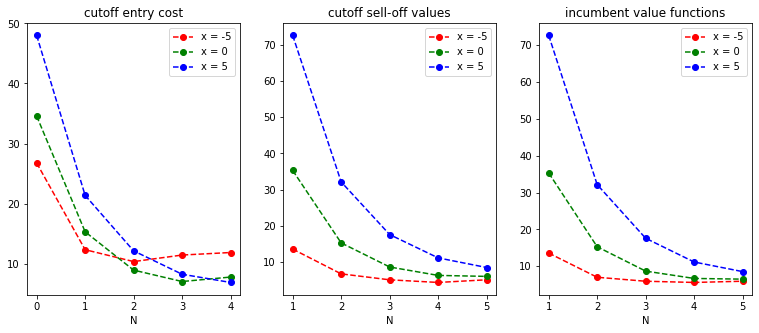

In [12]:
plt.figure(figsize=(13, 5))

plt.subplot(1,3,1)
plt.plot([0,1,2,3,4], entry_TH_x0, marker='o', linestyle='--', color='r', label='x = -5')
plt.plot([0,1,2,3,4], entry_TH_x1, marker='o', linestyle='--', color='g', label='x = 0')
plt.plot([0,1,2,3,4], entry_TH_x2, marker='o', linestyle='--', color='b', label='x = 5')
plt.xticks([0,1,2,3,4], [0,1,2,3,4])
plt.title("cutoff entry cost")
plt.xlabel("N")
plt.legend()


plt.subplot(1,3,2)
plt.plot([1,2,3,4,5], exit_TH_x0, marker='o', linestyle='--', color='r', label='x = -5')
plt.plot([1,2,3,4,5], exit_TH_x1, marker='o', linestyle='--', color='g', label='x = 0')
plt.plot([1,2,3,4,5], exit_TH_x2, marker='o', linestyle='--', color='b', label='x = 5')
plt.xticks([1,2,3,4,5], [1,2,3,4,5])
plt.title("cutoff sell-off values")
plt.xlabel("N")
plt.legend()


plt.subplot(1,3,3)
plt.plot([1,2,3,4,5], V_bar_x0, marker='o', linestyle='--', color='r', label='x = -5')
plt.plot([1,2,3,4,5], V_bar_x1, marker='o', linestyle='--', color='g', label='x = 0')
plt.plot([1,2,3,4,5], V_bar_x2, marker='o', linestyle='--', color='b', label='x = 5')
plt.xticks([1,2,3,4,5], [1,2,3,4,5])
plt.title("incumbent value functions")
plt.xlabel("N")
plt.legend()


plt.show()

## Question 8

In [13]:
# def x_simulator(current_x_idx):
#     '''
#     input: current x index
#     output: tmr x index
#     '''
#     tmr_x_idx = random.choices(population = [0,1,2], weights = x_transition[current_x_idx], k = 1)[0]
#     return tmr_x_idx

def N_simulator(current_N, current_x_idx, entry_TH, exit_TH):
    ''' 
    input: current_N, current_x_idx
    output: tmr_N
    '''
    if current_N == 0:
        gamma_draw = np.random.normal(gamma_loc, gamma_scale, 1)[0]
        entry_TH_value = entry_TH[current_N][current_x_idx]
        tmr_N = current_N + int(gamma_draw < entry_TH_value)    
        entry_decision = int(gamma_draw < entry_TH_value)
        exit_decision = 0
    elif current_N == 5:
        mu_draw_array = np.random.normal(mu_loc, mu_scale, current_N)
        exit_TH_value_array = np.full(current_N, exit_TH[current_N-1][current_x_idx])
        tmr_N = current_N - (mu_draw_array > exit_TH_value_array).sum()
        entry_decision = 0
        exit_decision = (mu_draw_array > exit_TH_value_array).sum()
    else:
        gamma_draw = np.random.normal(gamma_loc, gamma_scale, 1)[0]
        mu_draw_array = np.random.normal(mu_loc, mu_scale, current_N)
        entry_TH_value = entry_TH[current_N][current_x_idx]
        exit_TH_value_array = np.full(current_N, exit_TH[current_N-1][current_x_idx])
        tmr_N = current_N - (mu_draw_array > exit_TH_value_array).sum() + int(gamma_draw < entry_TH_value) 
        entry_decision = int(gamma_draw < entry_TH_value)
        exit_decision = (mu_draw_array > exit_TH_value_array).sum()
    
    return tmr_N, entry_decision, exit_decision
    


In [14]:
def DGP_main():
    N_list = [0]
    x_idx_list = [1]
    entry_decision_list = []
    exit_decision_list = []
    counter = 1
    while (counter < 10001):
        tmr_x_idx = x_simulator(x_idx_list[-1], counter)
        x_idx_list.append(tmr_x_idx)

        tmr_N, entry_decision, exit_decision = N_simulator(N_list[-1], x_idx_list[-1], entry_TH, exit_TH)
        N_list.append(tmr_N)
        entry_decision_list.append(entry_decision)
        exit_decision_list.append(exit_decision)

        counter += 1

    simulated_data = df({'N': N_list[:-1], 'x_idx': x_idx_list[:-1], 'entry_decision': entry_decision_list, 'exit_decision': exit_decision_list})
    # simulated_data.to_csv("simuldated_data.csv")

    return simulated_data, x_idx_list

In [15]:
N_list = [DGP_main()[0]['N'].mean() for i in range(100)]
#simulated_data = pd.read_csv("simuldated_data.csv")
print("average number of firms across 10,000 periods (100 MC sample): ", np.array(N_list).mean())

average number of firms across 10,000 periods (100 MC sample):  3.406054


In [16]:
x_idx_list = DGP_main()[1]

## Question 9

In [17]:
entry_TH_tax, exit_TH_tax, V_bar_tax = eqm_finder_entry_cost(3, theta_distribution, theta_search, cournot_pi_matrix)

/Users/iankim/Library/Mobile Documents/com~apple~CloudDocs/Documents/2ndYear/Daniel/HW/pset2/simulation.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  term_2_temp = mu_loc + mu_scale*(norm.pdf(z, loc=0, scale=1)/(1 - norm.cdf(z, loc=0, scale=1)))


In [18]:
def DGP_tax(x_idx_list):
    N_list_tax = [0]
    counter = 1
    while (counter < 10001):
        tmr_N = N_simulator(N_list_tax[-1], x_idx_list[counter-1], entry_TH_tax, exit_TH_tax)[0]
        N_list_tax.append(tmr_N)
        counter += 1

    simulated_data_tax = df({'N': N_list_tax, 'x_idx': x_idx_list})
    #simulated_data_tax.to_csv("simulated_data_tax.csv")

    return simulated_data_tax

In [19]:
N_list_tax = [DGP_tax(x_idx_list)['N'].mean() for i in range(100)]
print("average number of firms across 10,000 periods with tax (100 MC sample): ", np.array(N_list_tax).mean())

average number of firms across 10,000 periods with tax (100 MC sample):  3.3338516148385167


In [20]:
stats.ttest_ind(N_list, N_list_tax)

Ttest_indResult(statistic=48.813402666508544, pvalue=2.3836771151715757e-112)

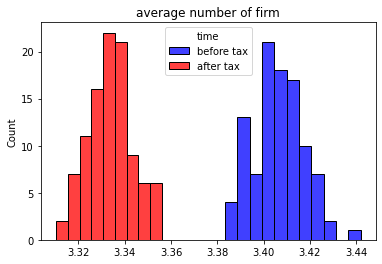

In [21]:
sns.histplot(N_list, color = "blue", label = "before tax")
sns.histplot(N_list_tax, color = "red", label = "after tax")

plt.legend(title = "time")
plt.title("average number of firm")
plt.show()

--------------------------------

# (2) Estimation Part 

## Question 10

In [25]:
simulated_data = DGP_main()[0]
simulated_data.to_csv("simulated_data.csv")

In [26]:
simulated_data

,N,x_idx,entry_decision,exit_decision
0,0,1,1,0
1,1,0,1,0
2,2,2,1,0
3,3,1,1,0
4,4,1,1,1
...,...,...,...,...
9995,3,0,1,1
9996,3,0,1,1
9997,3,0,1,3
9998,1,0,1,0


In [27]:
simulated_data = pd.read_csv("simulated_data.csv")
simulated_data = simulated_data.rename(columns={"Unnamed: 0":"t"})

In [28]:
simulated_data

,t,N,x_idx,entry_decision,exit_decision
0,0,0,1,1,0
1,1,1,0,1,0
2,2,2,2,1,0
3,3,3,1,1,0
4,4,4,1,1,1
...,...,...,...,...,...
9995,9995,3,0,1,1
9996,9996,3,0,1,1
9997,9997,3,0,1,3
9998,9998,1,0,1,0


In [29]:
# (1) estimate entry decision
entry_prob = df(simulated_data.groupby(['N', 'x_idx'])['entry_decision'].mean()).reset_index()
#impute N = 0, x_idx = 2 as 1
entry_prob.loc[17] = [0,2,1] 
entry_prob = entry_prob.sort_values(['N', 'x_idx'])
estimated_entry_prob = entry_prob.loc[entry_prob['N'] != 5]

In [30]:
# (2) estimate exit decision
exit_decision_data = simulated_data.loc[simulated_data['N'] != 0]
exit_N_list = []
exit_x_idx_list = []
exit_decision_list = []
remain_decision_list = []

for i in range(exit_decision_data.shape[0]):
    N = exit_decision_data['N'].values[i]
    x_idx = exit_decision_data['x_idx'].values[i]
    exit_decision = exit_decision_data['exit_decision'].values[i]
    remain_decision = N - exit_decision
    
    for j in range(N):
        exit_N_list.append(N)
        exit_x_idx_list.append(x_idx)
    
    for k in range(exit_decision):
        exit_decision_list.append(1)
        remain_decision_list.append(0)    
    
    for l in range(remain_decision):
        exit_decision_list.append(0)
        remain_decision_list.append(1)

exit_decision_long_data = df({"N": exit_N_list, "x_idx": exit_x_idx_list, "exit_decision": exit_decision_list, "remain_decision": remain_decision_list})
estimated_remain_prob = df(exit_decision_long_data.groupby(['N', 'x_idx'])['remain_decision'].mean()).reset_index()
estimated_exit_prob = df(exit_decision_long_data.groupby(['N', 'x_idx'])['exit_decision'].mean()).reset_index()

In [31]:
estimated_remain_prob_matrix = np.ones((5,3))
for N in [1,2,3,4,5]:
    for x_idx in [0,1,2]:
        temp_value = estimated_remain_prob.loc[(estimated_remain_prob['N']==N) & (estimated_remain_prob['x_idx']==x_idx)]['remain_decision'].values[0]
        estimated_remain_prob_matrix[N-1][x_idx] = temp_value

estimated_entry_prob_matrix = np.ones((5,3))
for N in [0,1,2,3,4]:
    for x_idx in [0,1,2]:
        temp_value = estimated_entry_prob.loc[(estimated_entry_prob['N']==N) & (estimated_entry_prob['x_idx']==x_idx)]['entry_decision'].values[0]
        estimated_entry_prob_matrix[N][x_idx] = temp_value

In [32]:
estimated_remain_prob_matrix

array([[1.        , 1.        , 1.        ],
       [0.85582596, 0.92763158, 0.94520548],
       [0.70459364, 0.86947791, 0.86918834],
       [0.5801105 , 0.70436927, 0.81298871],
       [0.64444444, 0.70094044, 0.811378  ]])

## Question 11

### (a) incumbent forward simulation

In [33]:
x_tick = [50, 250, 500, 1000, 2500, 5000, 7500, 10000, 12500, 15000]
average_value = []
for k in x_tick:
    simulation_list = [forward_simulate_incumbent.remote(beta, cournot_pi_matrix, entry_TH, exit_TH, theta_distribution, s, 2, 2) for s in range(k)]
    simulation_array = np.array(ray.get(simulation_list))
    average_value.append(simulation_array.mean())

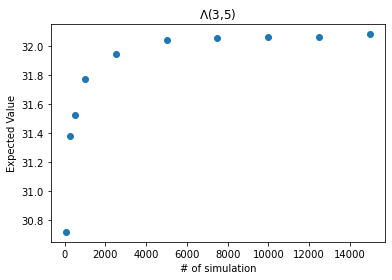

In [34]:
plt.scatter(x_tick, average_value)
plt.title("$\Lambda$(3,5)")
plt.xlabel("# of simulation")
plt.ylabel("Expected Value")
plt.show()

### (b) entrant forward simulation

In [37]:
x_tick = [50, 250, 500, 1000, 2500, 5000, 7500, 10000, 12500, 15000]
average_value = []
for k in x_tick:
    simulation_list = [forward_simulate_entrant.remote(beta, cournot_pi_matrix, entry_TH, exit_TH, theta_distribution, s, 2, 2) for s in range(k)]
    simulation_array = np.array(ray.get(simulation_list))
    average_value.append(simulation_array.mean())

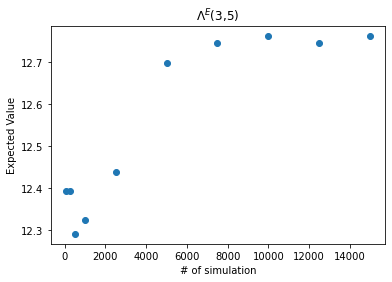

In [38]:
plt.scatter(x_tick, average_value)
plt.title("$\Lambda^E$(3,5)")
plt.xlabel("# of simulation")
plt.ylabel("Expected Value")
plt.show()

## Question 12

In [39]:
def Q_n_first_method(theta_distribution, sim_num):
    gamma_loc, gamma_scale, mu_loc, mu_scale = theta_distribution
    entry_TH = norm.ppf(estimated_entry_prob_matrix, loc=gamma_loc, scale=gamma_scale)
    exit_TH = norm.ppf(estimated_remain_prob_matrix, loc=mu_loc, scale=mu_scale)

    # (1) generate incumbent lambda matrix
    Lambda_matrix_incumbent = np.ones((5,3))
    for N in [1,2,3,4,5]:
        for x_idx in [0,1,2]:
            simulation_list = [forward_simulate_incumbent.remote(beta, cournot_pi_matrix, entry_TH, exit_TH, theta_distribution, s, N, x_idx) for s in range(sim_num)]
            simulation_array = np.array(ray.get(simulation_list))
            Lambda_matrix_incumbent[N-1][x_idx] = simulation_array.mean()

    # (2) generate entrant lambda matrix
    Lambda_matrix_entrant = np.ones((5,3))
    for N in [0,1,2,3,4]:
        for x_idx in [0,1,2]:
            simulation_list = [forward_simulate_entrant.remote(beta, cournot_pi_matrix, entry_TH, exit_TH, theta_distribution, s, N, x_idx) for s in range(sim_num)]
            simulation_array = np.array(ray.get(simulation_list))
            Lambda_matrix_entrant[N][x_idx] = simulation_array.mean()

    incumbent_term = ((norm.cdf((Lambda_matrix_incumbent - mu_loc)/mu_scale) - estimated_remain_prob_matrix)**2).sum()
    entrant_term = ((norm.cdf((Lambda_matrix_entrant - gamma_loc)/gamma_scale) - estimated_entry_prob_matrix)**2).sum()

    return incumbent_term + entrant_term


In [40]:
def Q_n_second_method(theta_distribution, sim_num):
    gamma_loc, gamma_scale, mu_loc, mu_scale = theta_distribution
    entry_TH_f, exit_TH_f, V_bar_f = eqm_finder(3, theta_distribution, theta_search, cournot_pi_matrix)

    # (1) generate incumbent lambda matrix
    Lambda_matrix_incumbent = np.ones((5,3))
    for N in [1,2,3,4,5]:
        for x_idx in [0,1,2]:
            simulation_list = [forward_simulate_incumbent.remote(beta, cournot_pi_matrix, entry_TH, exit_TH, theta_distribution, s, N, x_idx) for s in range(sim_num)]
            simulation_array = np.array(ray.get(simulation_list))
            Lambda_matrix_incumbent[N-1][x_idx] = simulation_array.mean()

    # (2) generate entrant lambda matrix
    Lambda_matrix_entrant = np.ones((5,3))
    for N in [0,1,2,3,4]:
        for x_idx in [0,1,2]:
            simulation_list = [forward_simulate_entrant.remote(beta, cournot_pi_matrix, entry_TH, exit_TH, theta_distribution, s, N, x_idx) for s in range(sim_num)]
            simulation_array = np.array(ray.get(simulation_list))
            Lambda_matrix_entrant[N][x_idx] = simulation_array.mean()

    incumbent_term = ((norm.cdf((Lambda_matrix_incumbent - mu_loc)/mu_scale) - estimated_remain_prob_matrix)**2).sum()
    entrant_term = ((norm.cdf((Lambda_matrix_entrant - gamma_loc)/gamma_scale) - estimated_entry_prob_matrix)**2).sum()

    return incumbent_term + entrant_term


In [42]:
MD_result_first = minimize(Q_n_first_method, [4,2,6,2], args = 1000, bounds = ((0,10), (0,10), (0,10), (0,10)), method='Nelder-Mead', options={'maxiter':200, 'disp': True})
MD_result_first

Optimization terminated successfully.
         Current function value: 0.089854
         Iterations: 199
         Function evaluations: 331


 final_simplex: (array([[ 4.07333542,  5.74735529,  0.        , 10.        ],
       [ 4.07339691,  5.74731623,  0.        , 10.        ],
       [ 4.07328294,  5.74740507,  0.        , 10.        ],
       [ 4.07323558,  5.74742694,  0.        ,  9.99999999],
       [ 4.07343056,  5.74731885,  0.        ,  9.99999999]]), array([0.08985415, 0.08985415, 0.08985415, 0.08985415, 0.08985415]))
           fun: 0.08985415246802225
       message: 'Optimization terminated successfully.'
          nfev: 331
           nit: 199
        status: 0
       success: True
             x: array([ 4.07333542,  5.74735529,  0.        , 10.        ])

In [43]:
MD_result_second = minimize(Q_n_second_method, [4,2,6,2], args = 1000, bounds = ((0,10), (0,10), (0,10), (0,10)), method='Nelder-Mead', options={'maxiter':200, 'disp': True})
MD_result_second

/Users/iankim/Library/Mobile Documents/com~apple~CloudDocs/Documents/2ndYear/Daniel/HW/pset2/simulation.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  term_2_temp = mu_loc + mu_scale*(norm.pdf(z, loc=0, scale=1)/(1 - norm.cdf(z, loc=0, scale=1)))


Optimization terminated successfully.
         Current function value: 0.196628
         Iterations: 73
         Function evaluations: 149


 final_simplex: (array([[3.86089515, 2.00901671, 5.4429935 , 2.24405323],
       [3.86079666, 2.00898573, 5.44299607, 2.2440587 ],
       [3.86087962, 2.00898203, 5.44302134, 2.2440451 ],
       [3.86096114, 2.00897456, 5.44294866, 2.24398707],
       [3.86087135, 2.00894965, 5.44297295, 2.24399665]]), array([0.1966282 , 0.19663071, 0.19663097, 0.19663224, 0.19663461]))
           fun: 0.19662820162622788
       message: 'Optimization terminated successfully.'
          nfev: 149
           nit: 73
        status: 0
       success: True
             x: array([3.86089515, 2.00901671, 5.4429935 , 2.24405323])